In [89]:
import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [48]:
PROJ_ROOT = "/home/fichtner/projects/footprintQTL"
HCA_BORGS_PROJ = "data/datasets/hca_brain-organoids"

os.chdir(PROJ_ROOT)
sys.path.append(os.path.join(PROJ_ROOT, "code"))
from helpers.helpers import ct_format, ct_format_alt

In [64]:
caqtl_stats = pd.read_csv(os.path.join(PROJ_ROOT, "data/datasets/hca_brain-organoids_processed/chromatin_accessibility/peaks_stats.tsv"), sep = '\t', header = 0)

print(caqtl_stats.columns)
caqtl_stats

Index(['RUN', 'CELL_TYPE', 'CA_DENSITY', 'N_SAMPLES', 'N_PEAKS_OG',
       'MIN_CELL_THRESH_HARD', 'N_PEAKS_HVP', 'N_PEAKS_MARKERS',
       'N_PEAKS_SCORE', 'N_PEAKS_EQTLS', 'N_PEAKS_CELL_THRESH_SOFT',
       'MANUAL_N_CA_QTLS'],
      dtype='object')


,RUN,CELL_TYPE,CA_DENSITY,N_SAMPLES,N_PEAKS_OG,MIN_CELL_THRESH_HARD,N_PEAKS_HVP,N_PEAKS_MARKERS,N_PEAKS_SCORE,N_PEAKS_EQTLS,N_PEAKS_CELL_THRESH_SOFT,MANUAL_N_CA_QTLS
0,sep2,Midbrain-EN,0.47,57,736845,12,2559,271195,401476,36,0,156
1,sep2,UL-EN,0.65,45,736845,19,5990,382525,401476,20,0,282
2,sep2,Stressed-Prog,0.62,68,736845,2,3390,381564,401476,10,0,359
3,sep2,immature-EN,0.57,50,736845,14,6144,354220,401476,14,0,352
4,sep2,Glia,0.54,65,736845,5,2572,321648,401476,64,0,469
5,sep2,DL-EN,0.61,47,736845,15,3319,346205,401476,21,0,151
6,sep2,Stressed-Neurons,0.38,70,736845,0,174,162646,401476,2,0,7
7,sep2,Dividing-Glia,0.55,70,736845,0,2217,194296,401476,32,0,255
8,sep2,Interneurons,0.33,54,736845,15,624,192307,401476,63,0,43
9,sep2,IPC,0.46,49,736845,17,3804,212576,401476,47,0,159


In [22]:
eqtls = pd.read_csv(os.path.join(HCA_BORGS_PROJ, "eQTL_mapping/eSNPs_significant_all_celltypes_HVGs.tsv"),
                   sep='\t',
                   header=0)
eqtls.set_index('QTL', drop=False, inplace=True)

print(eqtls.columns)
eqtls

Index(['snp_id', 'p_value', 'beta', 'beta_se', 'empirical_feature_p_value',
       'feature_chromosome', 'feature_start', 'feature_end', 'gene_name',
       'n_samples', 'n_e_samples', 'alpha_param', 'beta_param', 'rho',
       'snp_chromosome', 'snp_position', 'assessed_allele', 'call_rate', 'maf',
       'hwe_p', 'feature_id', 'QTL', 'global_corrected_pValue',
       'global_corrected_pValue_BH', 'global_corrected_pValue_BF', 'celltype'],
      dtype='object')


,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,gene_name,n_samples,...,assessed_allele,call_rate,maf,hwe_p,feature_id,QTL,global_corrected_pValue,global_corrected_pValue_BH,global_corrected_pValue_BF,celltype
QTL,,,,,,,,,,,,,,,,,,,,,
ENSG00000269376-chr13_112983450_T_C,chr13_112983450_T_C,0.000066,-0.364427,0.092665,0.000000e+00,13,113009671,113010319,NaN,277,...,C,1.0,0.044776,1.000000,ENSG00000269376,ENSG00000269376-chr13_112983450_T_C,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
ENSG00000183463-chr13_27824764_C_T,chr13_27824764_C_T,0.047441,-0.089739,0.045430,0.000000e+00,13,27977717,27988693,URAD,277,...,C,1.0,0.089552,0.073438,ENSG00000183463,ENSG00000183463-chr13_27824764_C_T,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
ENSG00000259182-chr15_101221494_A_C,chr15_101221494_A_C,0.202509,-0.088910,0.069866,0.000000e+00,15,101168530,101170821,NaN,277,...,A,1.0,0.044776,0.110206,ENSG00000259182,ENSG00000259182-chr15_101221494_A_C,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
ENSG00000286922-chr12_127567286_A_G,chr12_127567286_A_G,0.265404,-0.030918,0.027792,0.000000e+00,12,127486938,127533242,NaN,277,...,G,1.0,0.074627,1.000000,ENSG00000286922,ENSG00000286922-chr12_127567286_A_G,0.000000e+00,0.000000e+00,0.000000e+00,immature_EN
ENSG00000286246-chr12_129375924_C_G,chr12_129375924_C_G,0.949835,-0.000101,0.001608,4.101945e-163,12,129622929,129625366,NaN,277,...,C,1.0,0.089552,0.073438,ENSG00000286246,ENSG00000286246-chr12_129375924_C_G,1.930191e-161,2.223254e-161,1.111627e-160,immature_EN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000250842-chr5_145190494_A_T,chr5_145190494_A_T,0.000033,0.535958,0.130797,1.828702e-02,5,145337932,145381670,NaN,310,...,A,1.0,0.316176,1.000000,ENSG00000250842,ENSG00000250842-chr5_145190494_A_T,4.610052e-02,4.610052e-02,1.000000e+00,Differentiating_RG
ENSG00000267537-chr19_28873752_G_A,chr19_28873752_G_A,0.000285,-0.620958,0.172965,1.854836e-02,19,28602379,28648303,NaN,310,...,G,1.0,0.066176,0.246147,ENSG00000267537,ENSG00000267537-chr19_28873752_G_A,4.669823e-02,4.669823e-02,1.000000e+00,Differentiating_RG
ENSG00000287056-chr6_168100952_C_G,chr6_168100952_C_G,0.001926,-0.216988,0.070509,1.932144e-02,6,168217032,168220262,NaN,310,...,C,1.0,0.102941,1.000000,ENSG00000287056,ENSG00000287056-chr6_168100952_C_G,4.858106e-02,4.858106e-02,1.000000e+00,Differentiating_RG


In [118]:
cell_types = caqtl_stats['CELL_TYPE'].unique().tolist()

In [66]:
print('Intersect caQTLS and eQTLs in\n')
print('Cell type\tCount\tFraction of caQTLs')

# cell_types = ['UL-EN']
for ct in cell_types:
    
    caqtls = pd.read_csv(f"results/peak_caQTLs_{ct_format(ct)}.txt",
                   sep='\t',
                   header=0)
    caqtls.set_index('SNP', drop=False, inplace=True)
    
    # caqtls['snp_chr'] = caqtls['SNP'].str.split('_').str[0]
    # caqtls['snp_pos'] = caqtls['SNP'].str.split('_').str[1]
    # caqtls['snp_ref_al'] = caqtls['SNP'].str.split('_').str[2]
    # caqtls['snp_query_al'] = caqtls['SNP'].str.split('_').str[3]
    
    eqtls_subset = eqtls[eqtls['celltype'] == ct_format_alt(ct)]
    
    caqtl_snps = caqtls['SNP'].unique()
    eqtl_snps = eqtls_subset['snp_id'].unique()
    interection_ca_e = list(set(caqtl_snps) & set(eqtl_snps))
    
    print(f'\"{ct}\"' \
          f'\t\t{len(interection_ca_e)}' \
          f'\t{len(interection_ca_e) // len(caqtl_snps)}\n')

Intersect caQTLS and eQTLs in

Cell type	Count	Fraction of caQTLs
"Midbrain-EN"		0	0

"UL-EN"		0	0

"Stressed-Prog"		0	0

"immature-EN"		0	0

"Glia"		4	0

"DL-EN"		0	0

"Stressed-Neurons"		0	0

"Dividing-Glia"		0	0

"Interneurons"		1	0

"IPC"		0	0

"Differentiating-RG"		0	0



# Manhattan plots

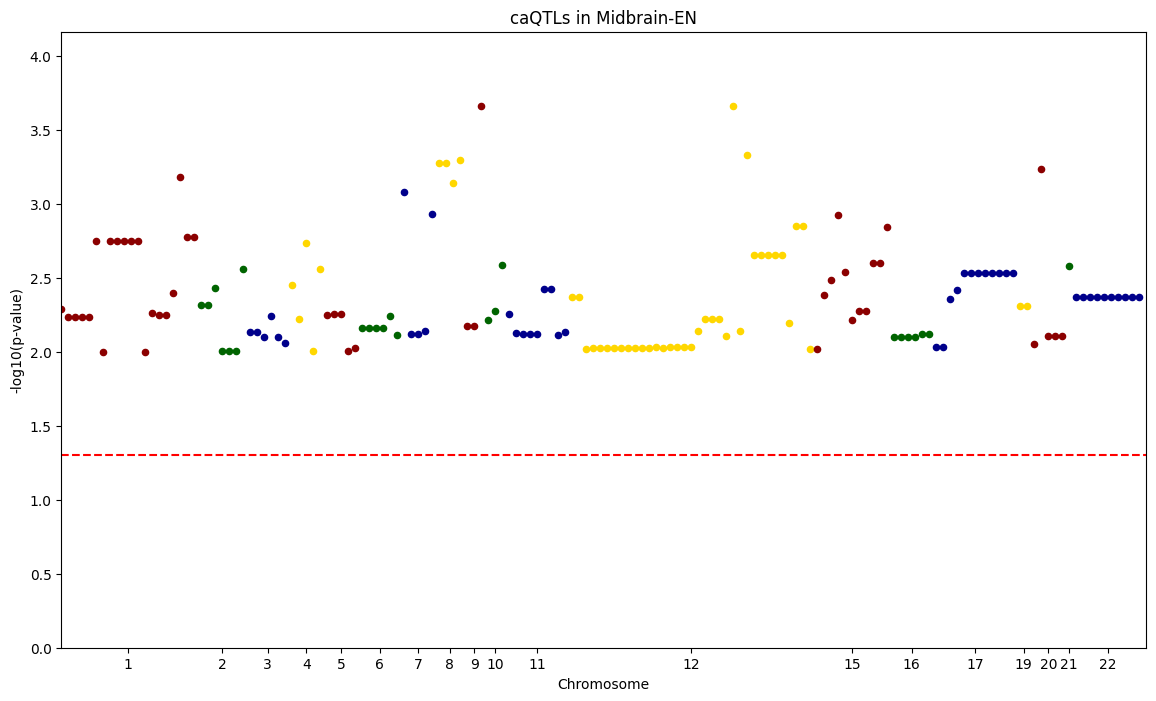

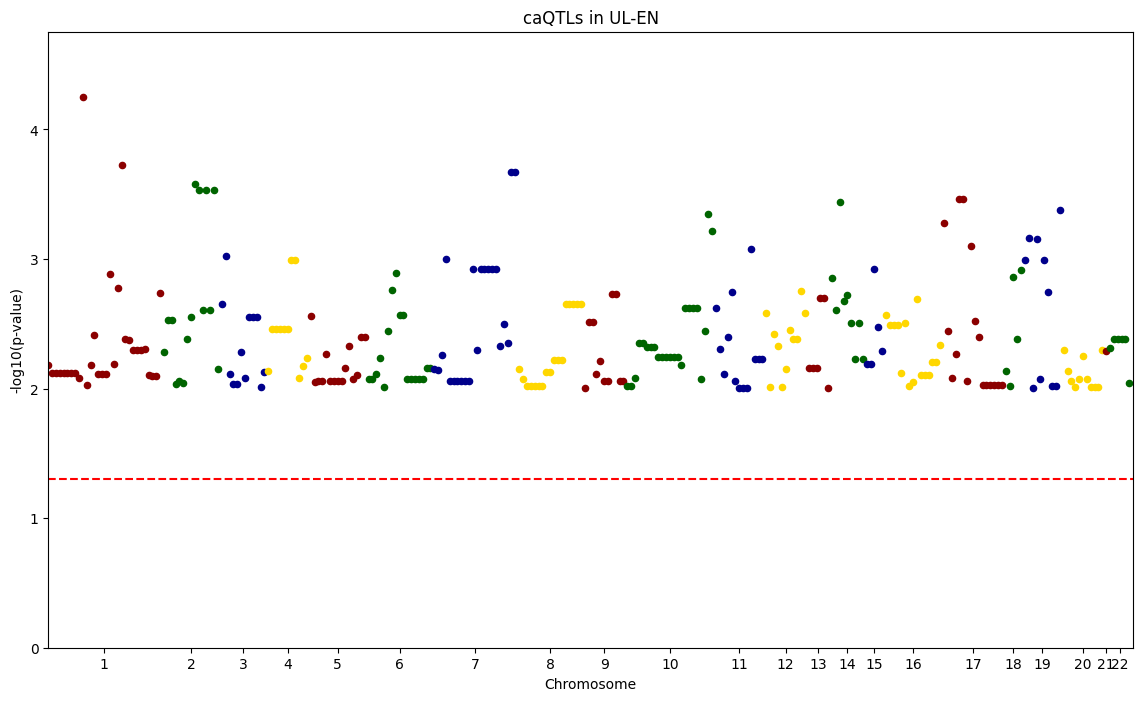

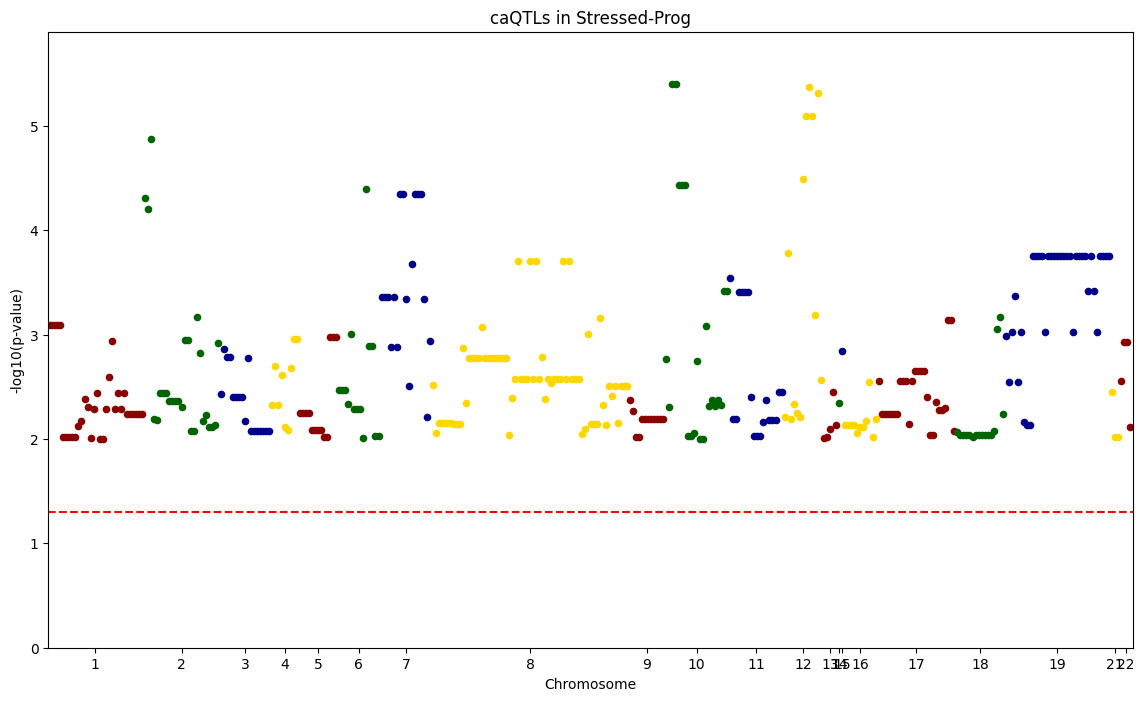

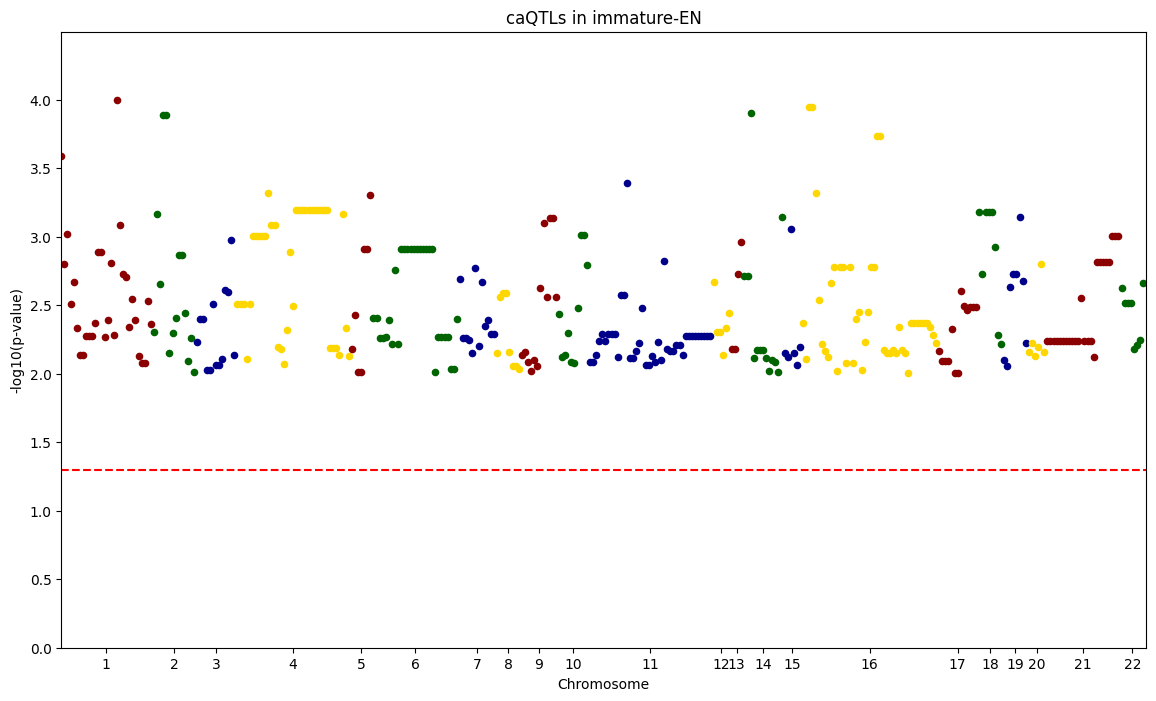

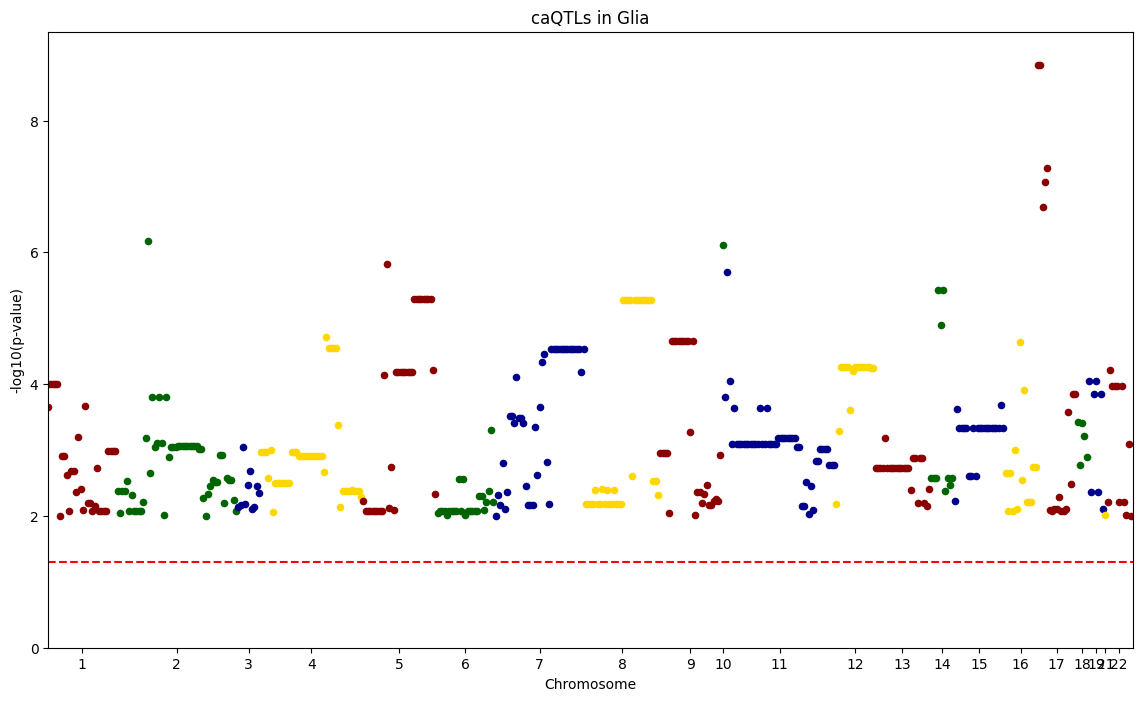

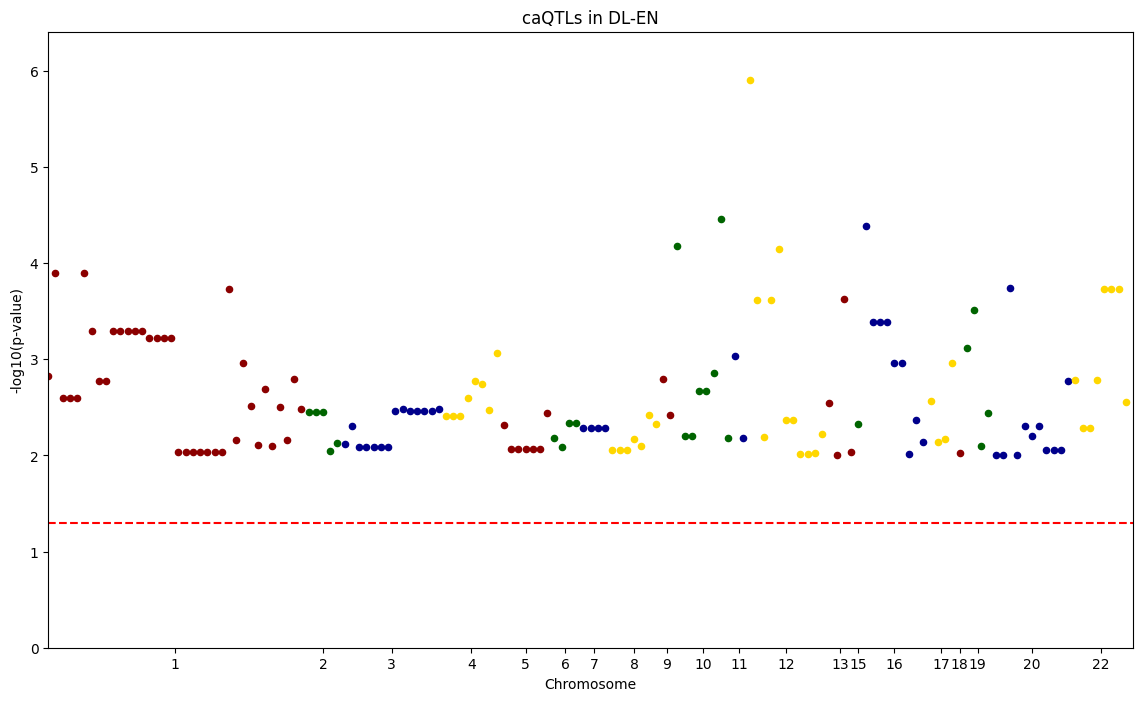

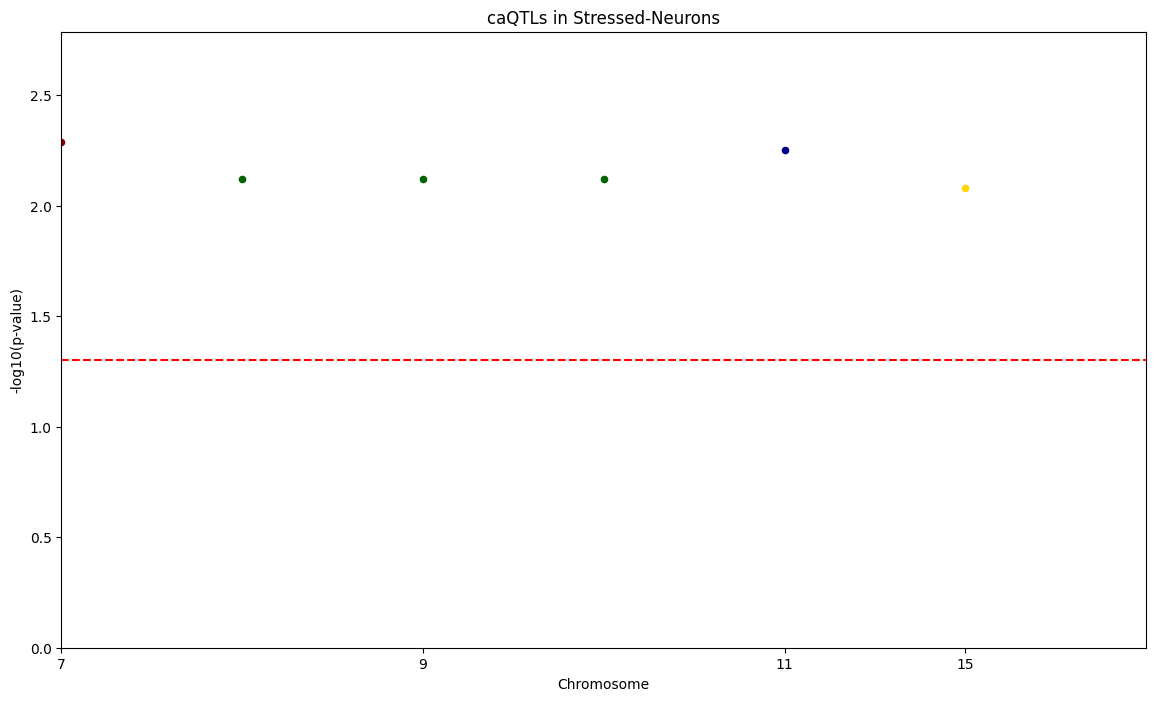

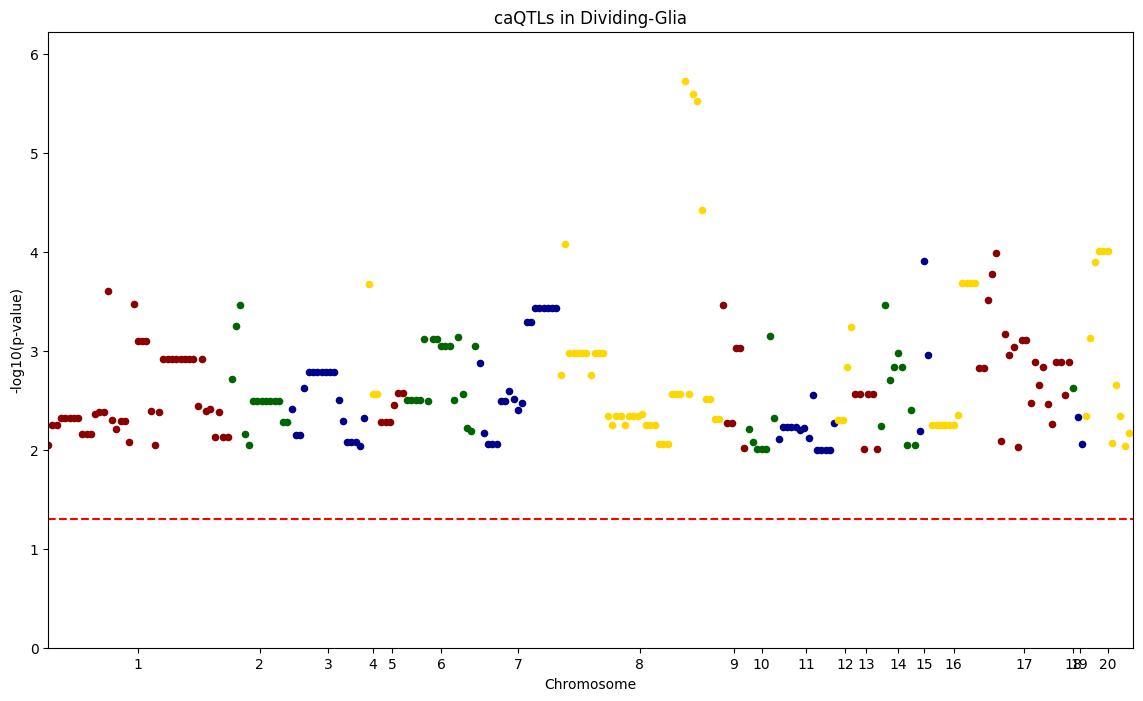

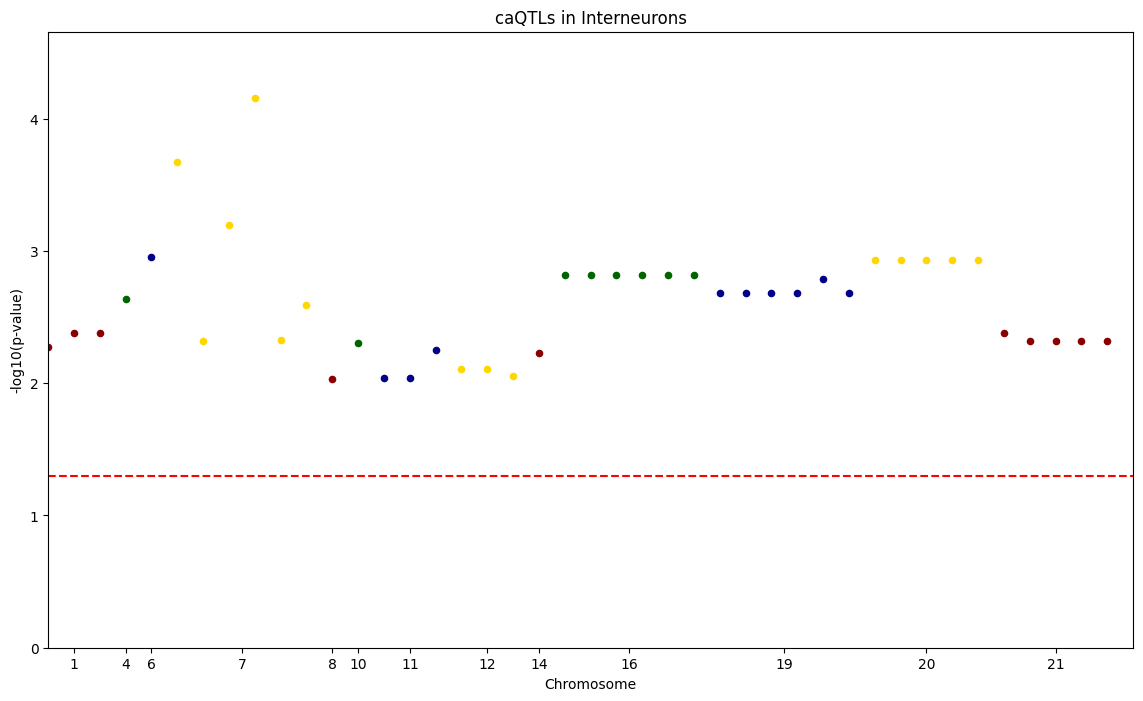

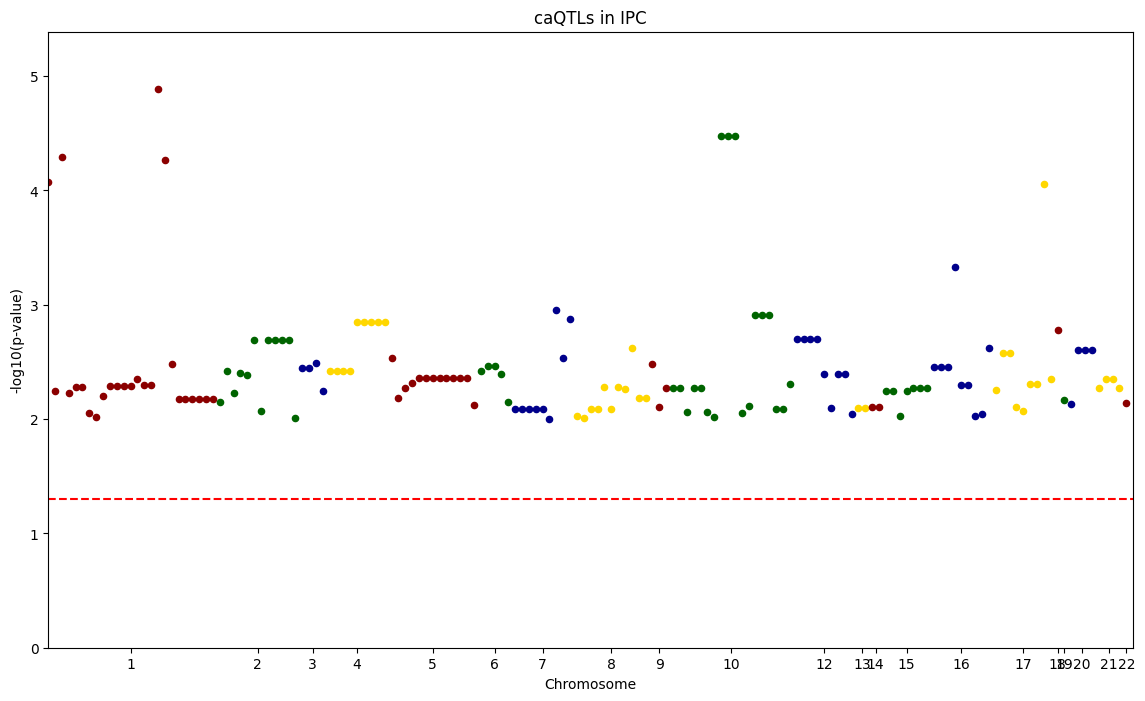

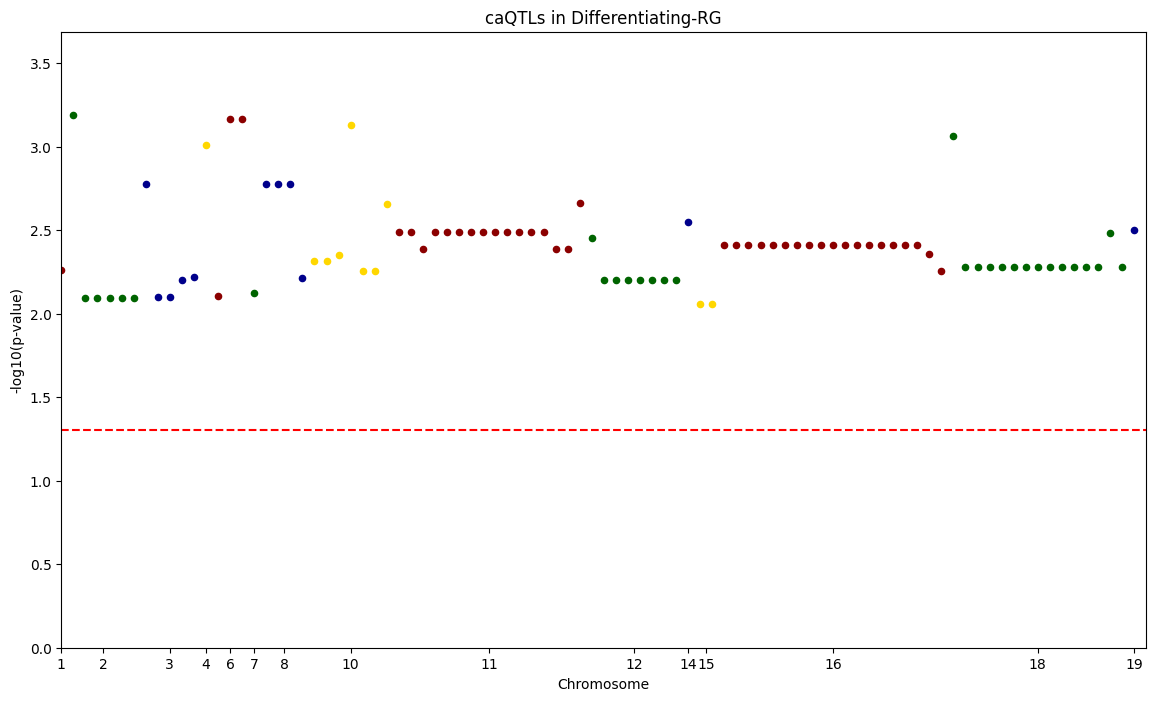

In [122]:
# cell_types = ['UL-EN']
for ct in cell_types:
        
        caqtls = pd.read_csv(f"results/peak_caQTLs_{ct_format(ct)}.txt",
                   sep='\t',
                   header=0)
        caqtls.set_index('SNP', drop=False, inplace=True)
        
        # Feature mutation
        caqtls['snp_chr'] = caqtls['SNP'].str.split('_').str[0]

        caqtls['snp_chr_'] = caqtls['snp_chr'].str.replace('chr', '')

        #TODO: solve NAN!!!
        # caqtls['snp_chr_'] = caqtls['snp_chr_'].fillna(0)
        caqtls['snp_chr_'] = caqtls['snp_chr_'].astype('category')
        # caqtls['snp_chr_'] = caqtls['snp_chr_'].cat.set_categories(['chr' + str(i) for i in range(24)], ordered=True)
        # print(caqtls)
        # print(caqtls['snp_chr_'].unique())
        
        caqtls['snp_pos'] = caqtls['SNP'].str.split('_').str[1]

        caqtls = caqtls.astype({'snp_chr_': 'int', 'snp_pos': 'int'})
        
        caqtls['minuslog10pvalue'] = -np.log10(caqtls['p-value'])

        caqtls = caqtls.sort_values(['snp_chr_', 'snp_pos'])
        
        
        # How to plot gene vs. -log10(p_value) and colour it by chromosome?
        caqtls['ind'] = range(len(caqtls))
        caqtls_grouped = caqtls.groupby(('snp_chr_'))

        # manhattan plot
        fig = plt.figure(figsize=(14, 8)) # Set the figure size
        ax = fig.add_subplot(111)
        colors = ['darkred','darkgreen','darkblue', 'gold']
        x_labels = []
        x_labels_pos = []
        for num, (name, group) in enumerate(caqtls_grouped):
            group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
            # ax.scatter(group['ind'], group['minuslog10pvalue'], color=colors[num % len(colors)], label=name, s=10)
            x_labels.append(name)
            # x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
            x_labels_pos.append(group['ind'].mean())

        ax.set_xticks(x_labels_pos)
        ax.set_xticklabels(x_labels)

        # set axis limits
        ax.set_xlim([0, len(caqtls)])
        ax.set_ylim([0, caqtls['minuslog10pvalue'].max() + 0.5])

        # x axis label
        plt.title(f'caQTLs in {ct}')
        ax.set_xlabel('Chromosome')
        ax.set_ylabel('-log10(p-value)')

        plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')

        # show the graph
        plt.show()

In [96]:
caqtls['snp_chr_'] = caqtls['snp_chr'].str.replace('chr', '')

In [97]:
caqtls = caqtls.astype({'snp_chr_': 'int', 'snp_pos': 'int'})

In [98]:
caqtls.columns

Index(['SNP', 'gene', 'beta', 't-stat', 'p-value', 'FDR', 'snp_chr', 'snp_pos',
       'snp_ref_al', 'snp_query_al', 'snp_chr_', 'minuslog10pvalue', 'ind'],
      dtype='object')

In [99]:
# Feature mutation
caqtls['minuslog10pvalue'] = -np.log10(caqtls['p-value'])
caqtls['snp_chr_'] = caqtls['snp_chr_'].astype('category')
caqtls['snp_chr_'] = caqtls['snp_chr_'].cat.set_categories([i for i in range(24)], ordered=True)
caqtls = caqtls.sort_values(['snp_chr_', 'snp_pos'])

In [100]:
caqtls

,SNP,gene,beta,t-stat,p-value,FDR,snp_chr,snp_pos,snp_ref_al,snp_query_al,snp_chr_,minuslog10pvalue,ind
SNP,,,,,,,,,,,,,
chr1_214103820_G_A,chr1_214103820_G_A,chr1:214102866:214103366:501:*:55725,0.027928,3.632100,0.005468,0.282571,chr1,214103820,G,A,1,2.262194,84
chr2_1613905_C_T,chr2_1613905_C_T,chr2:1614002:1614502:501:*:470,0.030058,5.096149,0.000649,0.282571,chr2,1613905,C,T,2,3.188078,17
chr2_216477277_T_C,chr2_216477277_T_C,chr2:216478141:216478641:501:*:54302,-0.012391,-3.386244,0.008047,0.323521,chr2,216477277,T,C,2,2.094372,85
chr2_216477340_A_G,chr2_216477340_A_G,chr2:216478141:216478641:501:*:54302,-0.012391,-3.386244,0.008047,0.323521,chr2,216477340,A,G,2,2.094372,86
chr2_216479269_C_T,chr2_216479269_C_T,chr2:216478141:216478641:501:*:54302,-0.012391,-3.386244,0.008047,0.323521,chr2,216479269,C,T,2,2.094372,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr18_687270_G_A,chr18_687270_G_A,chr18:686786:687286:501:*:181,-0.024087,-3.661564,0.005223,0.282571,chr18,687270,G,A,18,2.282095,12
chr18_687904_C_A,chr18_687904_C_A,chr18:686786:687286:501:*:181,-0.024087,-3.661564,0.005223,0.282571,chr18,687904,C,A,18,2.282095,13
chr18_688103_C_G,chr18_688103_C_G,chr18:686786:687286:501:*:181,0.033653,3.961908,0.003295,0.282571,chr18,688103,C,G,18,2.482178,14


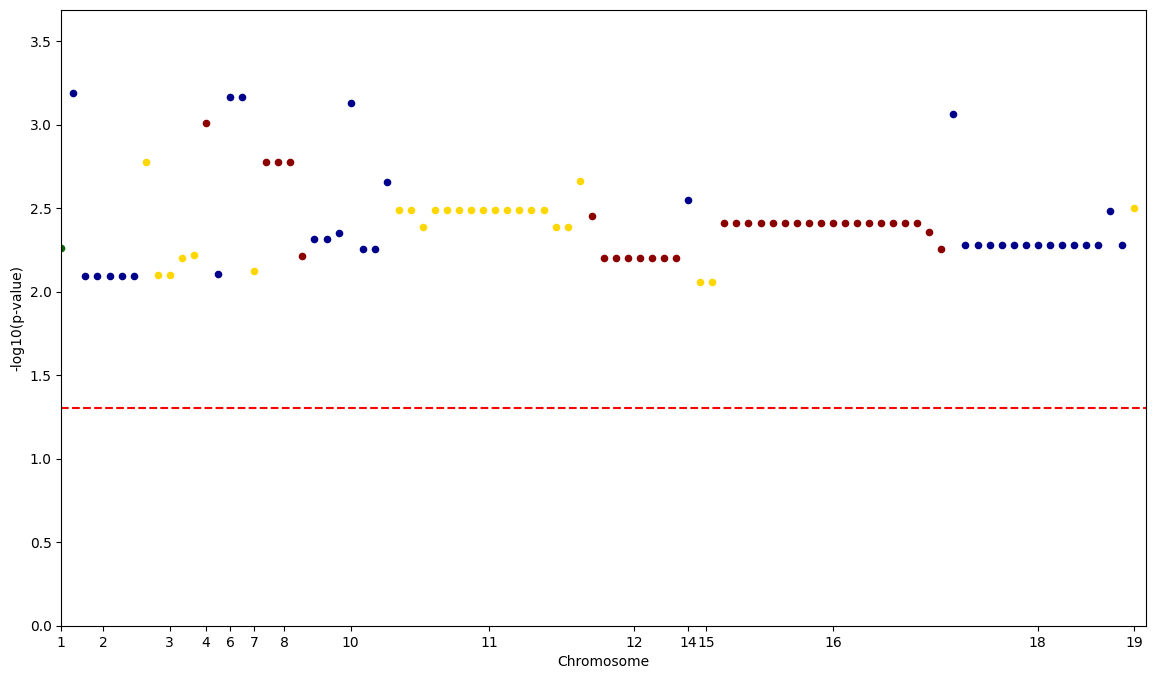

In [101]:
# How to plot gene vs. -log10(p_value) and colour it by chromosome?
caqtls['ind'] = range(len(caqtls))
caqtls_grouped = caqtls.groupby(('snp_chr_'))

# manhattan plot
fig = plt.figure(figsize=(14, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(caqtls_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
    # ax.scatter(group['ind'], group['minuslog10pvalue'], color=colors[num % len(colors)], label=name, s=10)
    x_labels.append(name)
    # x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    x_labels_pos.append(group['ind'].mean())

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(caqtls)])
ax.set_ylim([0, caqtls['minuslog10pvalue'].max() + 0.5])

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(p-value)')

plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')

# show the graph
plt.show()